# 01 파이썬 리뷰

## 파일 읽기 

In [1]:
# -*- coding: utf-8 -*-

fd=open("./files/studentlist.txt")

fd.readline() # 헤딩 

lines= fd.readlines()

print ("line# : ", len(lines))

line# :  17


## 필드 분할, type 가공

In [2]:
Table=[] # 전체 레코드를 담은 테이블 

for line in lines :  # 한 줄 씩  line 변수에 담아서
    
    fields= line.split(",") # , 를 기준으로 나눈다. -> fields라는 list가 만들어진다.
    # name,sex,age,grade,absence,bloodtype,height,weight,dept
    #  0    1   2    3    4        5         6     7      8

    fields[2]= int(fields[2])  # 나이를 숫자로 바꿔 넣기

    fields[6]= float(fields[6])  # 키를 숫자로 바꿔 넣기
    fields[7] = float(fields[7]) # 몸무게도 
    fields[8]= fields[8].strip()
          
    Table.append(fields)  #레코드를 테이블에 추가 

print (Table[1:3])

[['이미린', '여자', 22, '2', '무', 'AB', 170.1, 53.0, '03'], ['홍길동', '남자', 24, '4', '무', 'B', 175.0, 80.1, '01']]


## 정렬

In [3]:
Table= sorted(Table, key = lambda con : con[2] ) # 나이로 정렬
for record in Table :
    print ( record[0], record[1], record[2])

손세수 여자 20
박미희 여자 21
김민수 남자 21
여수근 남자 21
이미린 여자 22
강수친 여자 22
방희철 남자 22
임동민 남자 22
김미진 여자 22
김길동 남자 23
김철수 남자 23
이희수 여자 23
이철린 남자 23
이희진 여자 23
홍길동 남자 24
박수호 남자 24
김동수 남자 24


## 기술 통계 : 평균 구하기, 키 평균

In [4]:
heightSum=0
for rec in Table :
    height= rec[6]
    heightSum+=height

print (heightSum / len(Table))

170.03529411764706


## 기술통계 :  도수 구하기 

### 학과 별 학생 수 

In [5]:
dept_dic= {}  # {학과 코드: 도수}
for rec in Table :
    dept_code=rec[8]
    if dept_code in dept_dic:
        dept_dic[dept_code]+=1
    else :
        dept_dic[dept_code]=1

print (dept_dic)

#실제학과명이 나오게 출력하기

{'01': 6, '03': 6, '02': 5}


## join 
### 학과 코드 파일 읽어서 도수 결과에 표기

In [6]:
deptcode={}  # {학과 코드 : 실제 명칭}

f=open("./files/deptcode.txt") 
for line in f:
    code, name=line.split(",")
    deptcode[code]=name.strip()
    #print (deptcode)

for key, value in dept_dic.items():
    print (deptcode[key], value)


소프트웨어 6
통계보험 6
AI융합 5


## group by :  혈액형 별 키 평균

### 혈액형 별 키 합계, 도수 집계  

In [7]:
b_table={}  # 집계 테이블 : { 혈액형 : [합계, 도수] }

for rec in Table :
    bloodtype=rec[5]
    if bloodtype in b_table:  # 진료과목이 있는지
        b_table[bloodtype]= [ b_table[bloodtype][0]+rec[6], b_table[bloodtype][1]+ 1]  # 키 합계, 갯수 
    else:
        b_table[bloodtype]= [rec[6], 1]  # 키 , 갯수 

print ( b_table)

{'A': [676.3, 4], 'O': [825.7, 5], 'AB': [532.2, 3], 'B': [856.4, 5]}


In [8]:
for key, value in b_table.items():
    print ( key , value[0]/value[1] )

A 169.075
O 165.14000000000001
AB 177.4
B 171.28


# Numpy

## 기본
ndarray : 1가지 type의 값들로 구성, axis = 차원

### 속성

- ndarray.ndim : 차원수
- ndarray.shape : 데이터 모양
- ndarray.size : 전체 값 개수
- ndarray.dtype : 값의 type
- ndarray.itemsize : 각 값의 크기 (byte)



In [1]:
import numpy as np

ar1= np.arange(15).reshape (3,5)
#arange: 15개의 숫자를 갖는 vector를 만든 뒤 3*5 행렬로 제작
ar1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [2]:
ar1.shape

(3, 5)

In [3]:
ar1.ndim

2

In [4]:
ar1.size

15

In [6]:
ar1.itemsize #리스트 안의 각 값의 크기를 보여줌

4

### 생성

- np.array ( 파이썬 리스트 ) 
- np.zeros (shape )  or np.ones , np.empty
- np.arrange (size) or np.arange (시작, 끝, 간격) 


In [7]:
np.array ( [1,2,3,4,5])

array([1, 2, 3, 4, 5])

In [8]:
np.zeros( (3,4) )

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.arange(15) #0부터 14까지의 숫자

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [10]:
np.arange(5, 20, 2) # 5부터 2씩 증가시키는데, 20보다 작은 숫자까지만.

array([ 5,  7,  9, 11, 13, 15, 17, 19])

## Operations

### 기본
- 사칙연산 : 벡터* 스칼라  => 각 element와 스칼라 연산
- 각 element 에 적용되는 연산:  exp(), sqrt() .. 
- 벡터 * 벡터 => 일반 벡터연산이 아니고, 같은 위치의 element 끼리 연산
- 벡터 곱은 @
- += 도 동작함 

In [11]:
A = np.array( [[1,2], [3,4]])
B = np.array ( [[2,3], [4,5]])

A

array([[1, 2],
       [3, 4]])

In [12]:
A*4

array([[ 4,  8],
       [12, 16]])

In [13]:
A+=3
A

array([[4, 5],
       [6, 7]])

In [14]:
A+B

array([[ 6,  8],
       [10, 12]])

In [15]:
np.sqrt(A)

array([[2.        , 2.23606798],
       [2.44948974, 2.64575131]])

In [16]:
B

array([[2, 3],
       [4, 5]])

In [17]:
A*B

array([[ 8, 15],
       [24, 35]])

In [18]:
A@B   # 내적 연산

array([[28, 37],
       [40, 53]])

### random 
- randn(모양) :  정규분포
- randint (최소값, 최대값, size=) : 정수 

In [19]:
np.random.randn(3,2) #0을 평균으로 하는 3*2 정규분포


array([[ 0.38908711,  0.5277948 ],
       [-0.12349409, -1.36153569],
       [ 1.52154991, -0.80639689]])

In [20]:
np.random.randint(1, 100, size=6).reshape(3,2) #1~100 사이에 있는 정수 6개를 갖고 3*2 행렬로 변환

array([[10, 59],
       [84,  4],
       [76, 28]])

### sum, max, min
- 기본 : 전체 array에서 


In [ ]:
A.sum()

In [ ]:
A.min()

### (중요) axis에 따른 연산

- 주요 파라메터 : axis =차원 기준 
- sum (axis=0 ) : 첫번째 차원으로 합
- sum (axis=1 ) : 두번째 차원으로 합

In [21]:
B=np.arange(12).reshape (3,4)  # 첫번째 차원 =3개 element , 두번째 차원 =각기 element 는 4개 짜리 array
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
B.sum (axis=0) # 3개의 element 끼리 더함, 0번 축은 위에서 아래로 내려오는 방향으로 더해짐

array([12, 15, 18, 21])

In [23]:
B.sum (axis=1) # 2번째 차원의 4개의 element 끼리 평균, 1번 축은 왼쪽에서 오른쪽 방향으로 더해짐

array([ 6, 22, 38])

In [24]:
B.max( axis=0) #0번 축 기준으로 가장 큰 것들이 나옴

array([ 8,  9, 10, 11])

## Indexing, slicing


- 1차원 : element A[2],  범위 A[2:5]
    - A[ (1,2,4)] :  multi index
- 2차원 : element B[2,3] , 범위 B [1:3, : ] ,   : 는 전체를 의미



In [35]:
A=np.arange (5, 15, 1)
print (A)
print (A[2])


[ 5  6  7  8  9 10 11 12 13 14]
7


In [36]:
print (A[(2,4),]) # 첫번째 axis에 대한 것을 명시 필요

[7 9]


In [37]:
A[1:3] #3전까지

array([6, 7])

In [38]:
B=np.arange(30).reshape((5,6))
B

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [39]:
B[3,2]

20

In [40]:
B[3, 2:4]

array([20, 21])

In [41]:
C=np.arange(45).reshape((5,3,3))
C

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]]])

In [42]:
C[:,:,1:2] #0번축과 1번축 전체에 대해서 1~2 요소를 뽑아라

array([[[ 1],
        [ 4],
        [ 7]],

       [[10],
        [13],
        [16]],

       [[19],
        [22],
        [25]],

       [[28],
        [31],
        [34]],

       [[37],
        [40],
        [43]]])

- ...  : 중간 idx 생략  

In [43]:
C[..., 1]

array([[ 1,  4,  7],
       [10, 13, 16],
       [19, 22, 25],
       [28, 31, 34],
       [37, 40, 43]])

In [44]:
C[1, ...]

array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [46]:
C[1,...,1]

array([10, 13, 16])

# Pandas

## dataframe 

- 2차원 구조, column 마다 다른 데이터 type 
- row = 레코드 , col = 필드
- 데이터처리, 통계 등은 column 단위로 이뤄짐
- tabular data ( 일반 csv 데이터 구조 처리에 적합)

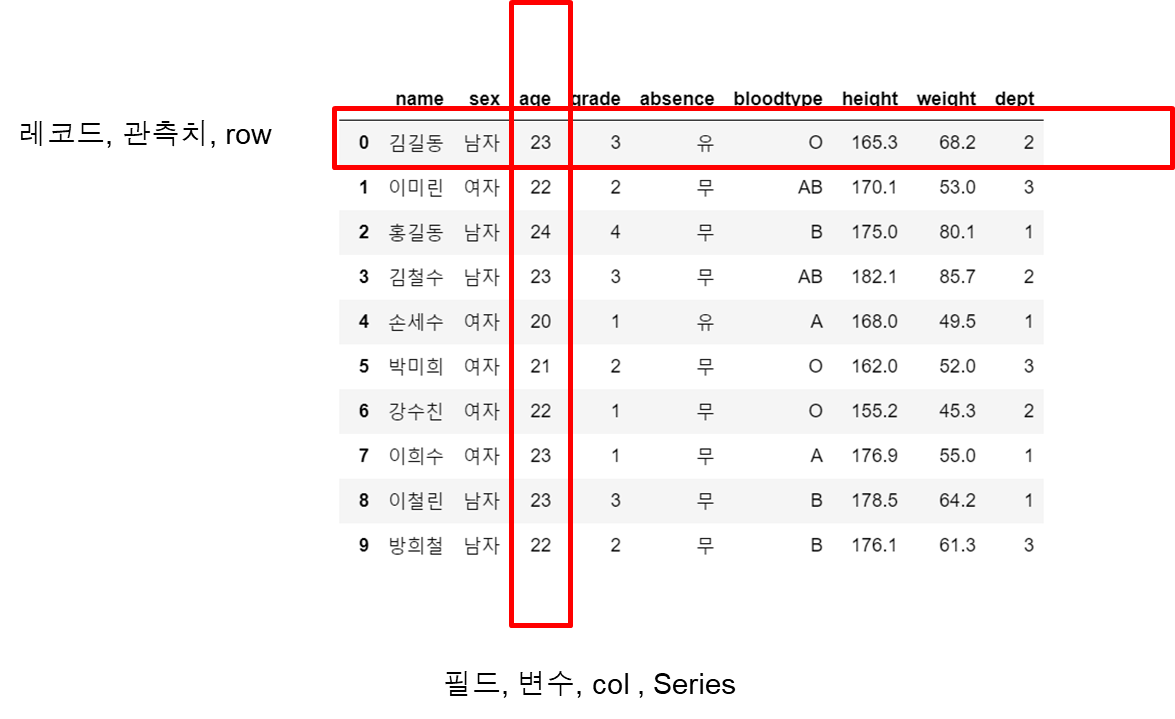

### 만들기

- 딕셔너리로부터 만들기  :  {'컬럼명': [ 값, 값,.. ], '컬럼명': [값, 값, .. ] }
   pd.DataFrame (딕셔너리) 
   
- index와 column label (컬럼명)

In [69]:
import pandas as pd

dic= { 'gender' : [ 1, 2, 1,2], 'bloodtype': ["A", "B", "O", "AB"]}

df1= pd.DataFrame(dic)

df1

,gender,bloodtype
0,1,A
1,2,B
2,1,O
3,2,AB


- numpy array를 사용 가능 

  DataFrame ( array, index= row index array, columns = 컬럼명 array)

In [70]:
df = pd.DataFrame(np.random.randn(6, 4), index=np.arange(6), columns=list("ABCD"))
df

,A,B,C,D
0,1.187176,-0.569697,-1.019564,-2.257447
1,1.642289,0.800134,-1.907866,1.861201
2,1.561497,0.006222,1.738284,-0.204902
3,0.659891,0.411753,0.070948,-0.731825
4,0.118906,1.514667,1.425812,1.058876
5,-1.576546,-0.034301,-0.279476,0.815836


In [71]:
# 날짜 생성

dates = pd.date_range("20220315", periods=6)  
dates

DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20'],
              dtype='datetime64[ns]', freq='D')

In [72]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-15,1.152092,1.581646,-1.243773,-0.163564
2022-03-16,-1.830744,-0.944186,1.246846,-0.050697
2022-03-17,2.169589,0.408820,0.523579,0.528161
2022-03-18,0.587281,0.010506,0.645668,-0.439875
2022-03-19,-0.638272,-0.347790,1.974926,0.292474
2022-03-20,-0.597724,-0.061686,1.091095,-0.342551


### 보기
- head() , tail() :  최초, 마지막 5개
- head (n), tail( n ) :  최초, 마지막 n개
- index , columns : row, column 이름

In [73]:
df.head()

,A,B,C,D
2022-03-15,1.152092,1.581646,-1.243773,-0.163564
2022-03-16,-1.830744,-0.944186,1.246846,-0.050697
2022-03-17,2.169589,0.408820,0.523579,0.528161
2022-03-18,0.587281,0.010506,0.645668,-0.439875
2022-03-19,-0.638272,-0.347790,1.974926,0.292474


In [74]:
df.tail(2)

,A,B,C,D
2022-03-19,-0.638272,-0.347790,1.974926,0.292474
2022-03-20,-0.597724,-0.061686,1.091095,-0.342551


In [75]:
df.index

DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### 간단한 통계

In [77]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.140370,0.107885,0.706390,-0.029342
std,1.440652,0.850325,1.085313,0.374028
min,-1.830744,-0.944186,-1.243773,-0.439875
25%,-0.628135,-0.276264,0.554101,-0.297805
50%,-0.005222,-0.025590,0.868382,-0.107130
75%,1.010889,0.309241,1.207908,0.206681
max,2.169589,1.581646,1.974926,0.528161


### sort

In [78]:
df.sort_values(by="B")

,A,B,C,D
2022-03-16,-1.830744,-0.944186,1.246846,-0.050697
2022-03-19,-0.638272,-0.347790,1.974926,0.292474
2022-03-20,-0.597724,-0.061686,1.091095,-0.342551
2022-03-18,0.587281,0.010506,0.645668,-0.439875
2022-03-17,2.169589,0.408820,0.523579,0.528161
2022-03-15,1.152092,1.581646,-1.243773,-0.163564


### csv 파일 읽기

read_csv(파일명) : csv 파일을 읽어서 data frame 만들기

In [79]:
import pandas as pd

df=pd.read_csv("studentlist.csv", encoding="cp949")
df

,name,sex,age,grade,absence,bloodtype,height,weight,dept
0,김길동,남자,23,3,유,O,165.3,68.2,2
1,이미린,여자,22,2,무,AB,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,80.1,1
3,김철수,남자,23,3,무,AB,182.1,85.7,2
4,손세수,여자,20,1,유,A,168.0,49.5,1
5,박미희,여자,21,2,무,O,162.0,52.0,3
6,강수친,여자,22,1,무,O,155.2,45.3,2
7,이희수,여자,23,1,무,A,176.9,55.0,1
8,이철린,남자,23,3,무,B,178.5,64.2,1
9,방희철,남자,22,2,무,B,176.1,61.3,3


### indexing, selection

In [80]:
df[0:3]  # rows

,name,sex,age,grade,absence,bloodtype,height,weight,dept
0,김길동,남자,23,3,유,O,165.3,68.2,2
1,이미린,여자,22,2,무,AB,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,80.1,1


In [81]:
df[["age","dept"]]  # column

,age,dept
0,23,2
1,22,3
2,24,1
3,23,2
4,20,1
5,21,3
6,22,2
7,23,1
8,23,1
9,22,3


- 숫자 index에 의한 참조 : iloc

In [82]:
df.iloc[1:5, 0:3]  

,name,sex,age
1,이미린,여자,22
2,홍길동,남자,24
3,김철수,남자,23
4,손세수,여자,20


In [83]:
df.iloc[ [1,2,4], [0, 2]]

,name,age
1,이미린,22
2,홍길동,24
4,손세수,20


- label에 의한 참조 : loc

In [84]:
df.loc[0:3, ["age","grade"]]  

,age,grade
0,23,3
1,22,2
2,24,4
3,23,3


- 값에 의한 참조 : boolean indexing , 조건에 맞는 row를 선택

In [85]:
df[ df["bloodtype"]=="B"]

,name,sex,age,grade,absence,bloodtype,height,weight,dept
2,홍길동,남자,24,4,무,B,175.0,80.1,1
8,이철린,남자,23,3,무,B,178.5,64.2,1
9,방희철,남자,22,2,무,B,176.1,61.3,3
14,김미진,여자,22,2,무,B,158.2,45.2,3
15,김동수,남자,24,4,유,B,168.6,70.2,1


- 포함 조건 : isin ( )

In [86]:
df.loc [df["bloodtype"].isin( ["B", "A"] ), ["name", "age"] ]

,name,age
2,홍길동,24
4,손세수,20
7,이희수,23
8,이철린,23
9,방희철,22
12,김민수,21
14,김미진,22
15,김동수,24
16,여수근,21


### column 연산 
- column.연산함수()
- 함수 ( column) 

In [87]:
df["age"].mean()

22.352941176470587

In [93]:
df.describe()

,age,grade,height,weight,dept
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,22.352941,2.294118,170.035294,61.064706,2.000000
std,1.169464,1.104802,7.849756,11.851685,0.866025
min,20.000000,1.000000,155.200000,45.200000,1.000000
25%,22.000000,1.000000,165.300000,53.000000,1.000000
50%,22.000000,2.000000,169.200000,61.300000,2.000000
75%,23.000000,3.000000,176.100000,68.200000,3.000000
max,24.000000,4.000000,182.100000,85.700000,3.000000


In [88]:
np.mean(df["age"] )

22.352941176470587

### operations

- concat ( objects, axis = 0 or 1) 

In [103]:
df2 = df[1:3]   # 2개 row
df3 = df[5:8]
df4 = pd.concat([df2, df3], axis=0) 
df4

,name,sex,age,grade,absence,bloodtype,height,weight,dept
1,이미린,여자,22,2,무,AB,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,80.1,1
5,박미희,여자,21,2,무,O,162.0,52.0,3
6,강수친,여자,22,1,무,O,155.2,45.3,2
7,이희수,여자,23,1,무,A,176.9,55.0,1


In [104]:
df2= df[["age", "grade"]]
df3= df[["height", "weight"]]
df4=pd.concat([df2, df3], axis=1)
df4

,age,grade,height,weight
0,23,3,165.3,68.2
1,22,2,170.1,53.0
2,24,4,175.0,80.1
3,23,3,182.1,85.7
4,20,1,168.0,49.5
5,21,2,162.0,52.0
6,22,1,155.2,45.3
7,23,1,176.9,55.0
8,23,3,178.5,64.2
9,22,2,176.1,61.3


## 과제 4 : 각 사람의 BMI ( 몸무게 kg /  (키 m ^2) )를 구하여 column을 추가하시오


In [114]:
w=df["weight"]
h=((df["height"] * 0.01) ** 2)
bmi = w/h
df["BMI"] = bmi
print(df)

'''
#다른 학우 풀이
df["BMI"] = df["weight"]/(df["height"]*0.01)**2
print(df)
'''

   name sex  age  grade absence bloodtype  height  weight  dept        BMI
0   김길동  남자   23      3       유         O   165.3    68.2     2  24.959660
1   이미린  여자   22      2       무        AB   170.1    53.0     3  18.317544
2   홍길동  남자   24      4       무         B   175.0    80.1     1  26.155102
3   김철수  남자   23      3       무        AB   182.1    85.7     2  25.844071
4   손세수  여자   20      1       유         A   168.0    49.5     1  17.538265
5   박미희  여자   21      2       무         O   162.0    52.0     3  19.814053
6   강수친  여자   22      1       무         O   155.2    45.3     2  18.806794
7   이희수  여자   23      1       무         A   176.9    55.0     1  17.575473
8   이철린  남자   23      3       무         B   178.5    64.2     1  20.149236
9   방희철  남자   22      2       무         B   176.1    61.3     3  19.767046
10  박수호  남자   24      4       유         O   167.1    62.0     3  22.204387
11  임동민  남자   22      2       무        AB   180.0    75.8     3  23.395062
12  김민수  남자   21      1  

'\n#다른 학우 풀이\ndf["BMI"] = df["weight"]/(df["height"]*0.01)**2\nprint(df)\n'

- merge (A, B, on=키 ) :  기본은 inner join

In [115]:
dff= pd.read_csv("./files/footsize.csv", encoding="cp949")
dff

,realname,footsize
0,강수친,245
1,김길동,275
2,김동수,265
3,김미진,235
4,김민수,270
5,김철수,280
6,박미희,240
7,박수호,280
8,방희철,275
9,손세수,240


In [116]:
df3= pd.merge(df, dff, left_on='name', right_on='realname')
df3

,name,sex,age,grade,absence,bloodtype,height,weight,dept,BMI,realname,footsize
0,김길동,남자,23,3,유,O,165.3,68.2,2,24.959660,김길동,275
1,이미린,여자,22,2,무,AB,170.1,53.0,3,18.317544,이미린,245
2,김철수,남자,23,3,무,AB,182.1,85.7,2,25.844071,김철수,280
3,손세수,여자,20,1,유,A,168.0,49.5,1,17.538265,손세수,240
4,박미희,여자,21,2,무,O,162.0,52.0,3,19.814053,박미희,240
5,강수친,여자,22,1,무,O,155.2,45.3,2,18.806794,강수친,245
6,이희수,여자,23,1,무,A,176.9,55.0,1,17.575473,이희수,245
7,이철린,남자,23,3,무,B,178.5,64.2,1,20.149236,이철린,260
8,방희철,남자,22,2,무,B,176.1,61.3,3,19.767046,방희철,275
9,박수호,남자,24,4,유,O,167.1,62.0,3,22.204387,박수호,280


### grouping

- groupby

In [117]:
df.groupby("grade").mean()

,age,height,weight,dept,BMI
grade,,,,,
1,21.4,166.300000,53.460000,1.400000,19.333316
2,21.8,169.280000,57.460000,3.000000,19.870805
3,23.0,175.500000,67.800000,1.750000,22.018952
4,24.0,170.233333,70.766667,1.666667,24.351742


In [118]:
df.groupby(["sex","bloodtype"]).mean()

age  grade      height     weight      dept        BMI
sex bloodtype                                                          
남자  A          21.00   1.00  165.700000  58.750000  1.500000  21.373023
    AB         22.50   2.50  181.050000  80.750000  2.500000  24.619567
    B          23.25   3.25  174.550000  68.950000  1.500000  22.691780
    O          23.50   3.50  166.200000  65.100000  2.500000  23.582024
여자  A          21.50   1.00  172.450000  52.250000  1.000000  17.556869
    AB         22.00   2.00  170.100000  53.000000  3.000000  18.317544
    B          22.00   2.00  158.200000  45.200000  3.000000  18.060321
    O          22.00   2.00  164.433333  50.133333  2.333333  18.581229

In [119]:
df.groupby(["sex","bloodtype"]).size()

sex  bloodtype
남자   A            2
     AB           2
     B            4
     O            2
여자   A            2
     AB           1
     B            1
     O            3
dtype: int64

# matplotlib

## 기본 내용

plt.plot ( x축 데이터, y축 데이터, plottype )


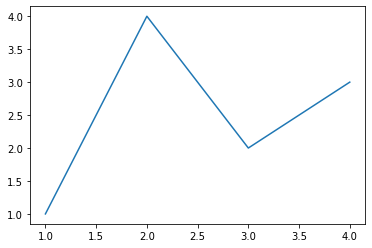

In [120]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.


## input data 형식 

- numpy array 이어야 함
- pandas column도 가능

### plot type

- "ro"  red circle 
 
- "b-"  solid blue line default
 
- "r--"  red dasesh
 
- "bs" blue squares
 
- "g^" green trianles

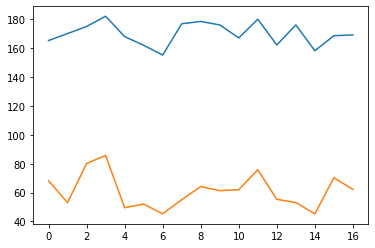

In [121]:
plt.plot( df[["height", "weight"]] )

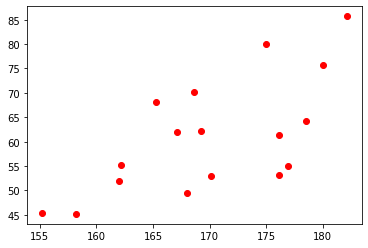

In [122]:
plt.plot( df["height"], df["weight"] , 'ro')

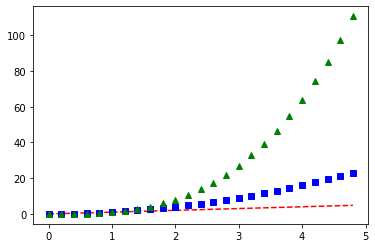

In [123]:
t = np.arange(0., 5., 0.2)  # 0~ 5까지 0.2 간격으로

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

## 여러 chart

- figure : 여러 axes를 포함
- subplot ( ) : 하나의 axes를 만듦
- bar (), scatter (), plot ()  각기 다른 모양  plot ()의 파라메터로도 표현 가능


Text(0.5, 0.98, 'Categorical Plotting')

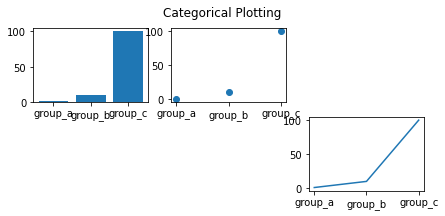

In [133]:
names = ['group_a', 'group_b', 'group_c']  # X
values = [1, 10, 100] # Y

plt.figure(figsize=(7, 3))  #전체 가로세로 크기

plt.subplot(231)   # 2 x 3 구성의 1번
plt.bar(names, values)  
plt.subplot(232)
plt.scatter(names, values)
plt.subplot(236)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

### 2가지 이상의 정보를 2차원에 표시

- scatter ( x, y, c=유형별 컬러, s=사이즈, data= label을 가진 원본 데이터)

In [10]:
plt.scatter (  "height", "weight", c="grade" ,data=df)

NameError: name 'plt' is not defined

# 크롤링

### 인터넷에서 정보 수집 
- SNS , 웹사이트

### 크롤링
- API 기반 정보수집 : 프로그램을 위한 정보 제공  API가 존재
- 스크레이핑  : 인간 사용자를 위해 제공된 웹페이지를 파싱하여 활용

# API 기반 크롤링

## Naver crawling (비 로그인 형)

### 1) 개발자 센터 가입

http://developers.naver.com

- 서비스 API 선택  ->  오픈 api 이용 신청 -> 어플리케이션 등록
    - 검색 API

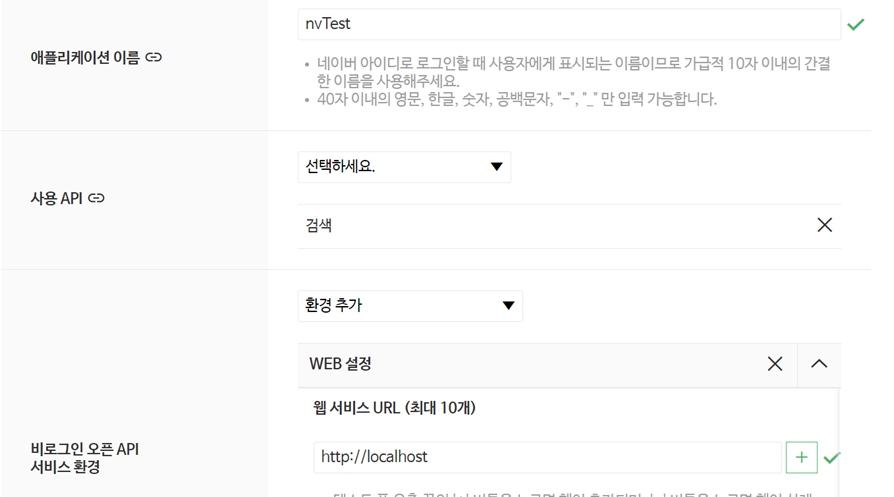
    
<br><br>
- application id와 키 획득
  
  
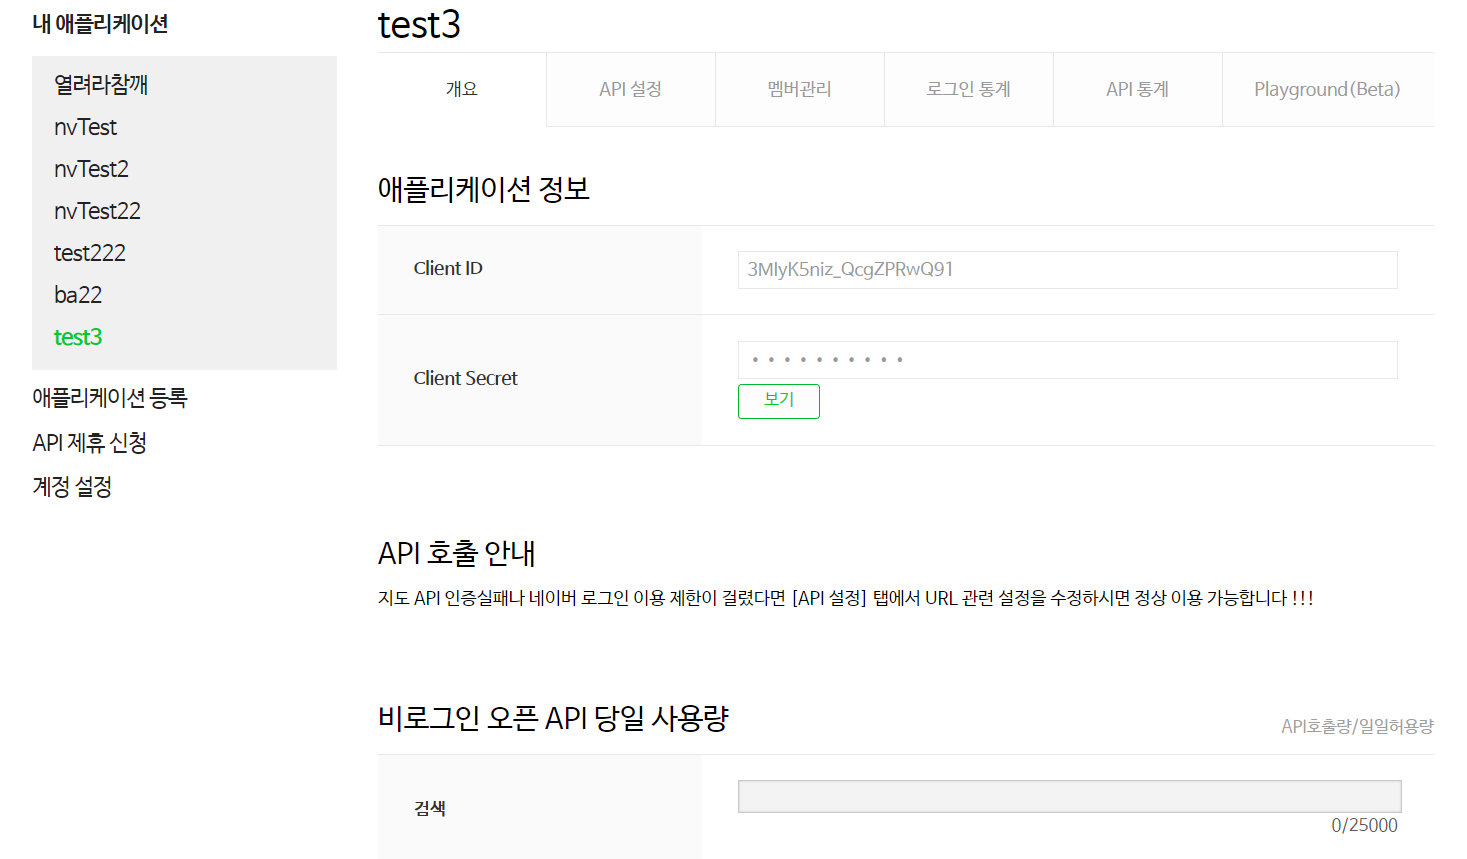


### 2) id와 키 설정



In [1]:
import os
import sys

import datetime
import time
import json

# 반드시 자기 id 로  넣기 
client_id = 'DheGMIxqKDa9lIC8vKCn'
client_secret = 'zoe6zaFIvW'

LEC=True

### 3) 네이버 크롤링 프로그램 구조

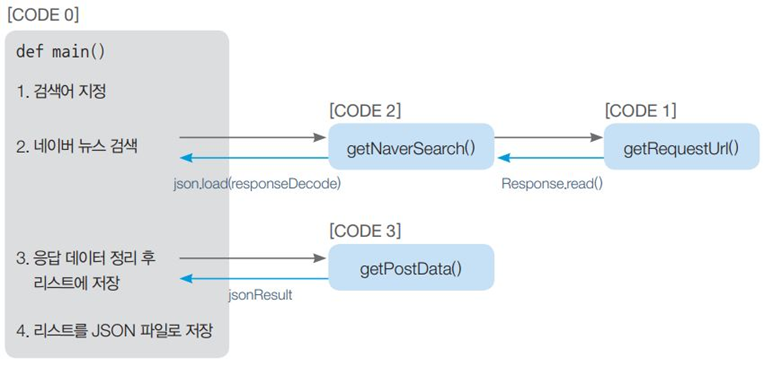


### 4)  urllib  호출 부분

- 헤더에 id, secret 포함하여, api url에 get 방식으로 접근


In [2]:
import urllib.request

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

### 5)  url 구성 및 호출

- 전체 목록

https://developers.naver.com/docs/common/openapiguide/apilist.md#%EB%B9%84%EB%A1%9C%EA%B7%B8%EC%9D%B8-%EB%B0%A9%EC%8B%9D-%EC%98%A4%ED%94%88-api  참조

- 뉴스 검색 API
    - 한번에 100개, 최대 1000개  가능

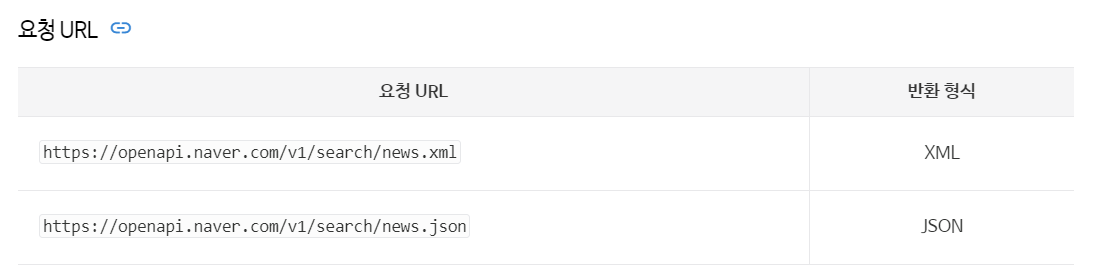

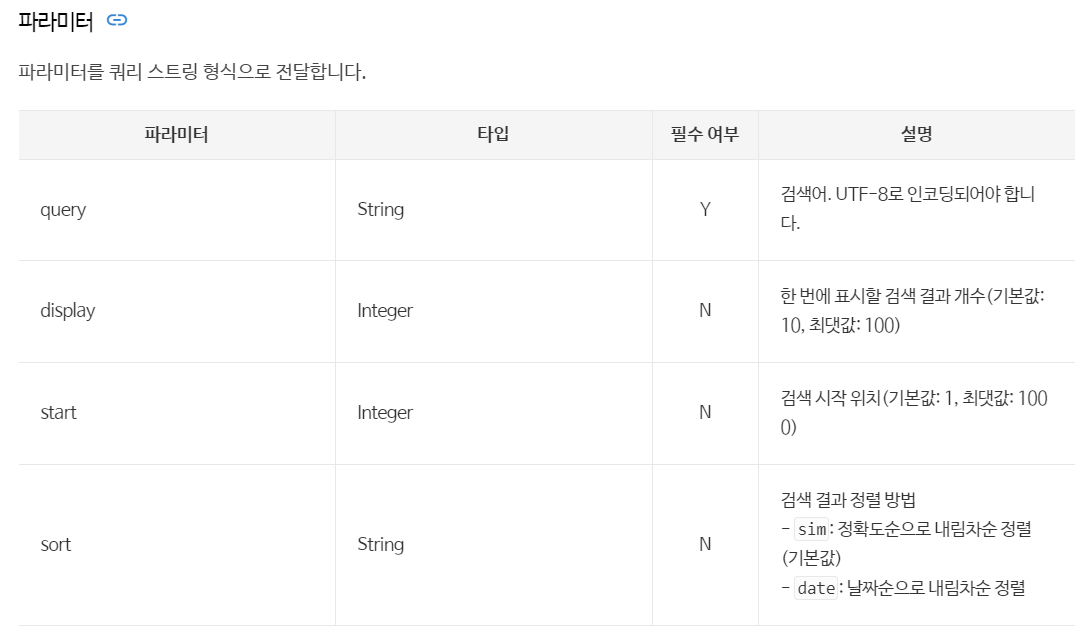

- Test

In [13]:
if LEC:
    q= urllib.parse.quote("챗GPT")  # url coding
    print(q)

    url = "https://openapi.naver.com/v1/search/news.json?query=%s&display=5"%q
    print (url)
    resp = getRequestUrl(url)
    #display 뒤에 붙은 숫자가 가져오는 결과의 개수

    print (resp)


%EC%B1%97GPT
https://openapi.naver.com/v1/search/news.json?query=%EC%B1%97GPT&display=5
[2023-04-16 16:17:22.699252] Url Request Success
{
	"lastBuildDate":"Sun, 16 Apr 2023 16:17:23 +0900",
	"total":24935,
	"start":1,
	"display":5,
	"items":[
		{
			"title":"대구본부세관, <b>챗GPT<\/b> 특강",
			"originallink":"https:\/\/www.idaegu.co.kr\/news\/articleView.html?idxno=417121",
			"link":"https:\/\/www.idaegu.co.kr\/news\/articleView.html?idxno=417121",
			"description":"대구본부세관은 13일 &apos;인공지능과 <b>챗GPT<\/b> 활용방안&apos;이라는 주제로 전문가를 초빙해 전 직원 대상 특강을 실시했다. 이날 교육은 소병구 AI메타버스연구원장을 초빙, 인공지능과 <b>챗GPT<\/b>의 이해와 향후 전망, <b>챗GPT<\/b>를 활용한... ",
			"pubDate":"Sun, 16 Apr 2023 16:14:00 +0900"
		},
		{
			"title":"삼성증권 , 인공지능·로봇 관련주 집중 투자…국내 첫 출시",
			"originallink":"https:\/\/www.mk.co.kr\/article\/10713601",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/009\/0005117079?sid=101",
			"description":"AI 챗봇인 &apos;<b>챗GPT<\/b>&apos; 열풍과 더불어 주요 기업들의 로봇 투자 흐름에 따라 AI 관련 종목에 수급이 몰리고 있는 상황에서 투자 전문가들의 도움을 얻어 AI


- URL 구성 하여 getRequestUrl()호출
- string인 json 결과를 json 객체로 loading하여 return

In [4]:
def getNaverSearch(svc, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    svc = "/%s.json" % svc
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + svc + parameters    
    responseDecode = getRequestUrl(url)   
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode) # json decode

- Test

In [5]:
if LEC :
    result=getNaverSearch("news", "챗GPT", 10, 2)
    print(  result) 

[2023-04-16 16:14:09.104507] Url Request Success
{'lastBuildDate': 'Sun, 16 Apr 2023 16:14:09 +0900', 'total': 24934, 'start': 10, 'display': 2, 'items': [{'title': '‘미래와소프트웨어’와 함께하는 꿈찾기 캠프 연 4회 확대 개최', 'originallink': 'https://www.munhwa.com/news/view.html?no=2023040901039936172001', 'link': 'https://n.news.naver.com/mnews/article/021/0002566834?sid=102', 'description': '최근 선풍적인 인기를 끄는 생성형 인공지능(AI), 챗지피티(GPT)를 활용해 AI 원리를 배우고 체험한다. 신청은... 둘째 날에는 <b>챗GPT</b>를 활용한 AI 수업을 받는다. 학생들은 <b>챗GPT</b> 개념과 원리를 눈높이에 맞게 쉽고, 재미있게... ', 'pubDate': 'Sun, 16 Apr 2023 15:19:00 +0900'}, {'title': '&quot;AI 개발 늦추자&quot;더니…머스크, AI 스타트업 세웠다', 'originallink': 'https://www.hankyung.com/it/article/202304160779i', 'link': 'https://n.news.naver.com/mnews/article/015/0004833188?sid=105', 'description': '하지만 머스크가 퇴사했던 시기 즈음에 AI 상용화 연구로 방향을 튼 뒤 지난해 11월 생성 AI인 ‘<b>챗GPT</b>’를 선보이면서 AI의 대중화에 불을 지폈다. AI 사업에 투자하려는 머스크의 모습은 최근 그가 보인 행보와도 사뭇... ', 'pubDate': 'Sun, 16 Apr 2023 15:17:00 +0900'}]}


### 7) 결과 가공

- json 구조로 부터 필요한 필드만 추출, 필요한 형태 변환 => list로 return 

In [6]:
def getPostData( resultJ, resultL):   
    for item in resultJ['items'] :

        #변환
        pDate = datetime.datetime.strptime(item['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
        pDate = pDate.strftime('%Y-%m-%d')

        #필드 추출 
        resultL.append( [ item['title'],   item['description'], item['originallink'], pDate])
    print (len(resultL))

In [7]:
if LEC:
    resultL=[]
    resultJ=getNaverSearch("news", "인공지능", 1, 6)
    getPostData( resultJ, resultL )
    print (resultL)


[2023-04-16 16:14:09.313254] Url Request Success
6
[['미래에셋자산운용, 반도체·2차전지·로봇 … IT 관련 혁신기업에 집중 베팅', '미래에셋코어테크 펀드는 국내 기술혁신 기업에 집중 투자하는 펀드로, 신성장 사업 가운데 기술혁신과 글로벌 경쟁력을 가진 반도체, 2차전지, 로봇, <b>인공지능</b>(AI) 등 IT 업종에 집중 투자한다. 전체적인 포트폴리오 역시... ', 'https://www.mk.co.kr/article/10713596', '2023-04-16'], ['키움증권, 상관관계 낮은 자산에 분산투자해 변동성 낮춰', '&apos;키우GO&apos;는 고객의 자산을 키워간다(Go)는 뜻으로 키움증권이 자체 개발한 <b>인공지능</b>(AI) 로보어드바이저가 투자 목표와 투자 기간·투자 예정 금액·투자자 성향 등을 종합적으로 고려해 고객에게 가장 적합한... ', 'https://www.mk.co.kr/article/10713602', '2023-04-16'], ['삼성증권 , <b>인공지능</b>·로봇 관련주 집중 투자…국내 첫 출시', '삼성POP골든랩 &apos;AI&amp;로보틱스 랩&apos; 삼성증권은 최근 <b>인공지능</b>(AI) 열풍에 힘입어 관련 테마 종목에 집중 투자하는 삼성POP골든랩 내 &apos;AI&amp;로보틱스 랩&apos;을 추천했다. 금융 시스템 위기설 등 불확실성이 여전한 상황에서 최근... ', 'https://www.mk.co.kr/article/10713601', '2023-04-16'], ['[기고]이제 국민 기대에 부응하고 감동 주는 성과를 내자', '지난해 위원회 발족 이후 &apos;챗GPT&apos; 같은 <b>인공지능</b>(AI) 모델이 나와 세상을 놀라게 하고 있다. 1년이면 세상이 완전히 바뀐다는 것을 실감나게 한다. 이렇게 빛의 속도로 변하는 기술과 환경을 제때 인지하고 이것을 적극적으로... ', 'https://www.etnews.com/2

- 전체 프로그램

In [8]:

def main():
    svc = 'news'   # 크롤링 할 대상  : news, blog, encyc, shop
    srcText = input('검색어를 입력하세요: ')
    resultL=[]
    start=1
     
    while True:         
        jsonResponse = getNaverSearch(svc, srcText, start, 100)        
        if jsonResponse == None:
            break
        getPostData(jsonResponse, resultL)
        start+=100
        if (start > 1000) :
            break


    print("가져온 데이터 : %d 건" %len( resultL))

    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 숭실대학교
[2023-04-16 16:14:20.715514] Url Request Success
100
[2023-04-16 16:14:20.901491] Url Request Success
200
[2023-04-16 16:14:21.146469] Url Request Success
300
[2023-04-16 16:14:21.321710] Url Request Success
400
[2023-04-16 16:14:21.505800] Url Request Success
500
[2023-04-16 16:14:21.690887] Url Request Success
600
[2023-04-16 16:14:21.888546] Url Request Success
700
[2023-04-16 16:14:22.114770] Url Request Success
800
[2023-04-16 16:14:22.314125] Url Request Success
900
[2023-04-16 16:14:22.545590] Url Request Success
1000
가져온 데이터 : 1000 건




# Facebook API 활용 (로그인 형)

## OAuth 

특정 사용자의 동의를 얻어 사용자의 정보를 가져오는데 API에서 사용자 인증 후 동의를 얻는데 사용

- 기본 구조

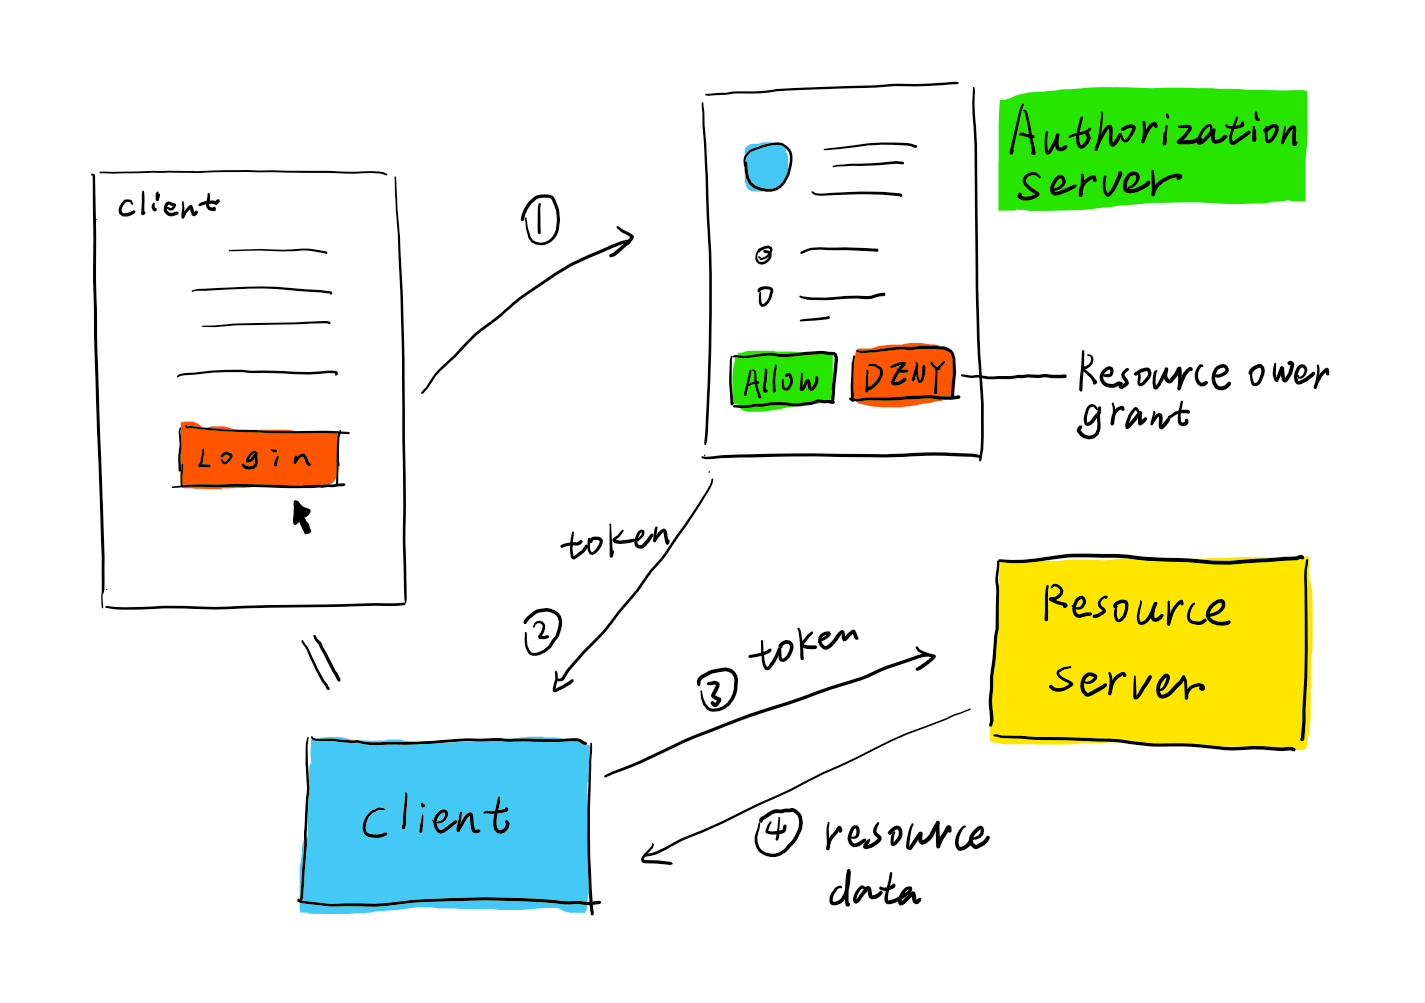


- 개발 흐름 : user token (동의) 확보 -> api에 user token 포함하여 호출

## 페이스북 OAuth 활용

### 1) Meta 개발자 등록, app 등록

- facebook 계정 필요
- https://developers.facebook.com/apps/create

<br>
- 앱만들기 -> 앱유형 : 비즈니스   -> 기본정보제공

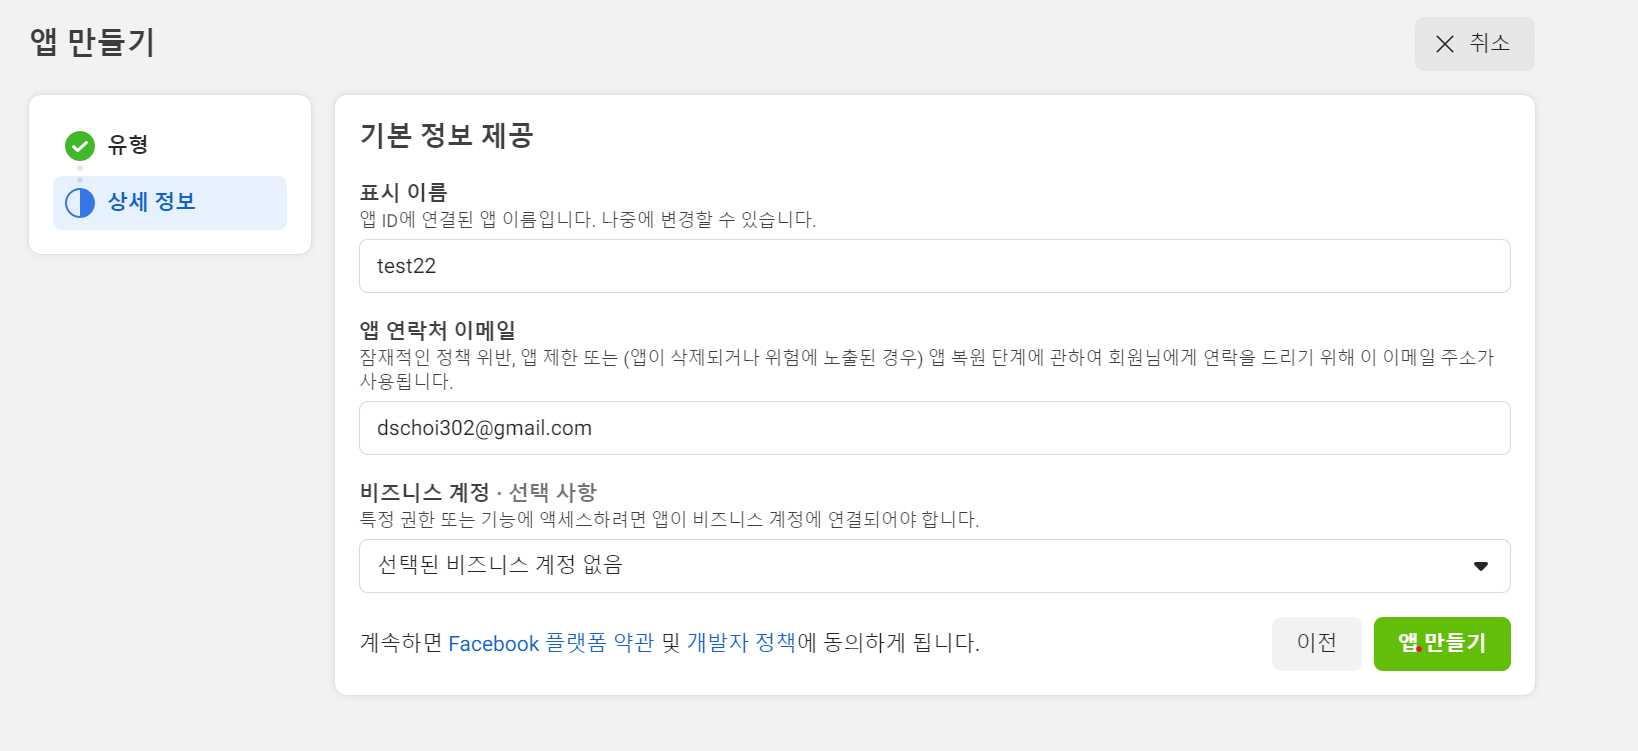

- 앱목록 : 테스트앱 만들기, 모든 권한 테스트 가능 ( 테스트앱이 아닌 경우, 검수를 받아야만 함)

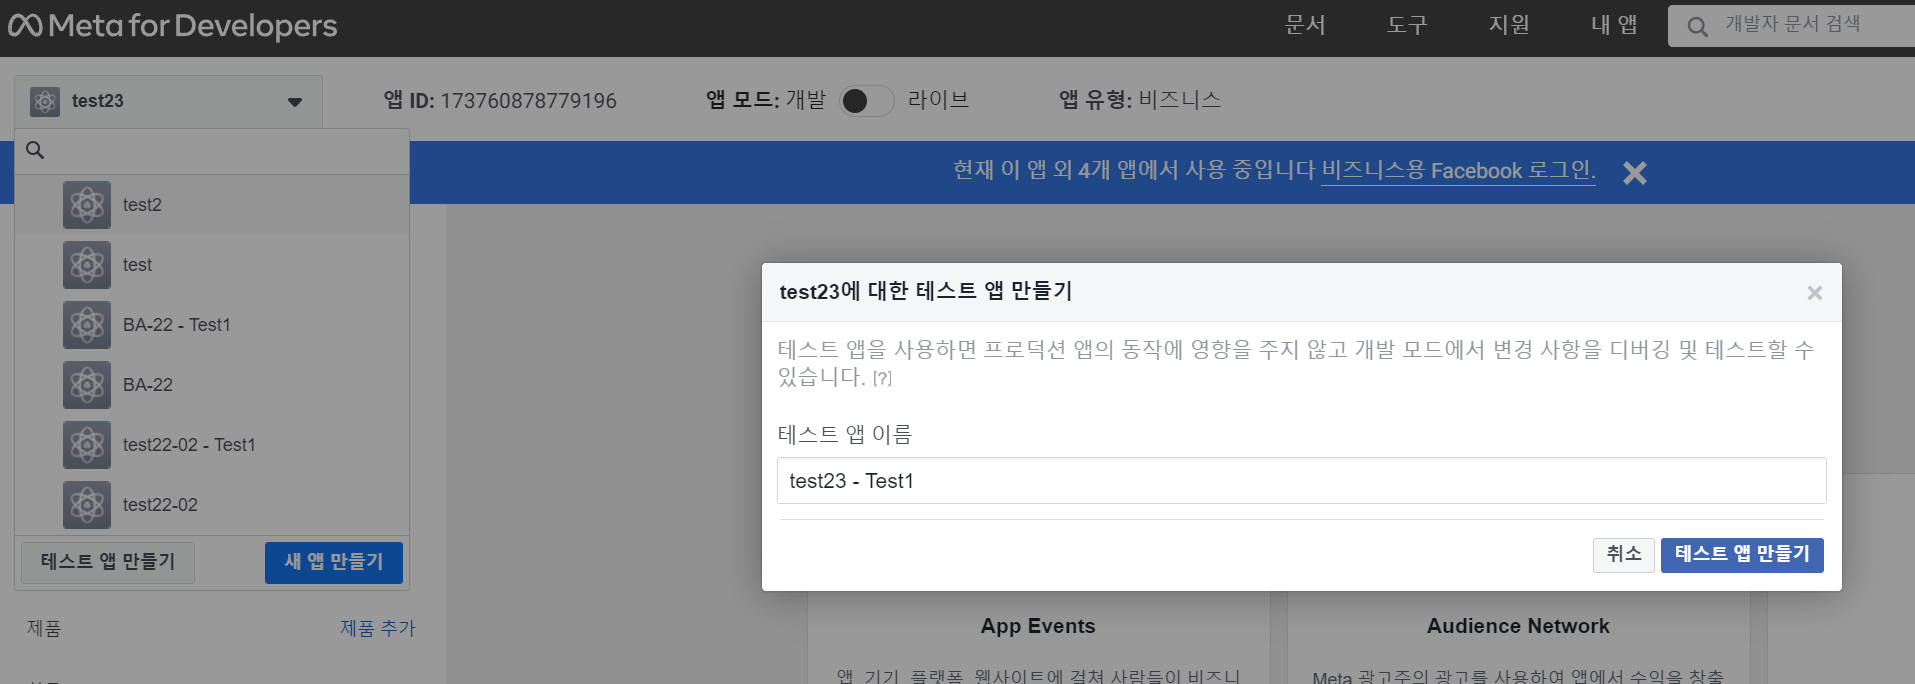

### 2) API 테스트  : API 탐색기


- 메뉴-도구-그래프 API 탐색기
- 권한 추가 : 추가 


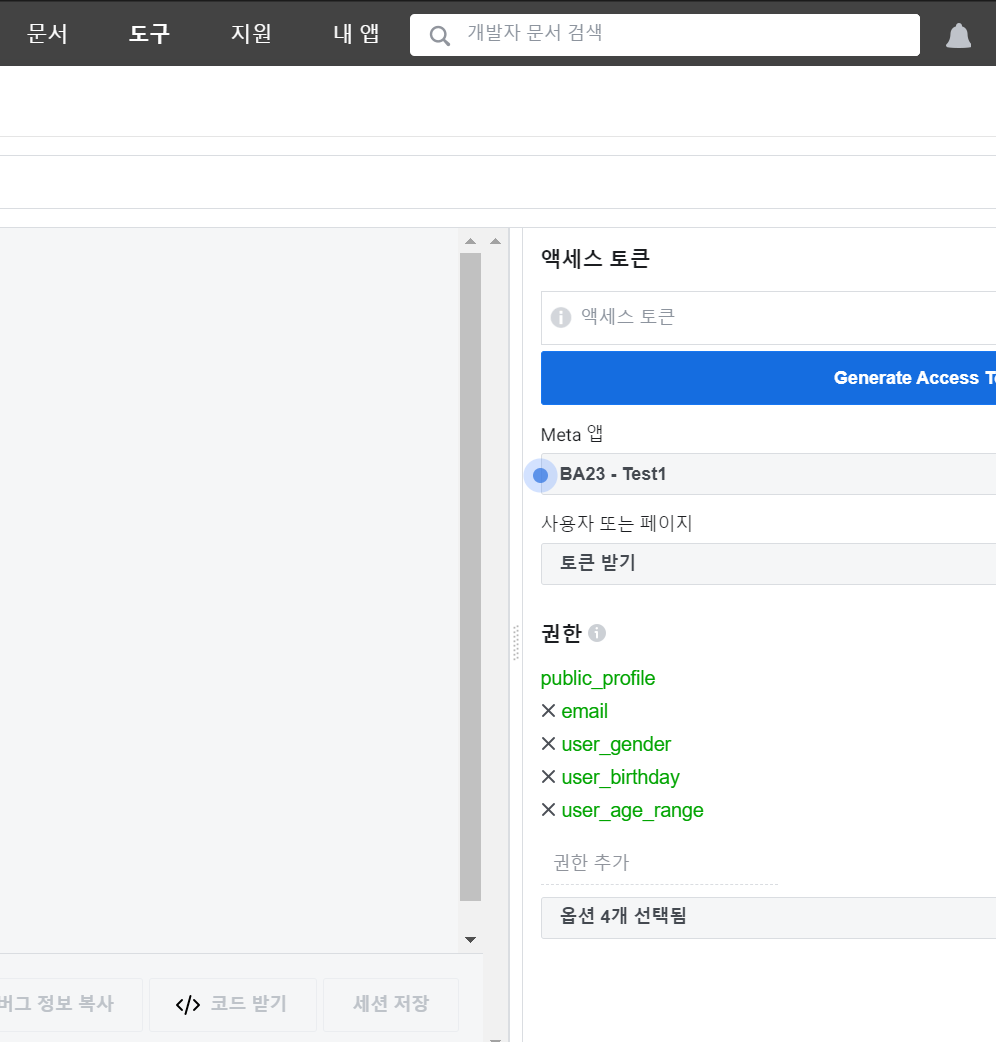

- Generate Access Token 실행 : 본인을 대상 사용자로서 토큰 받기

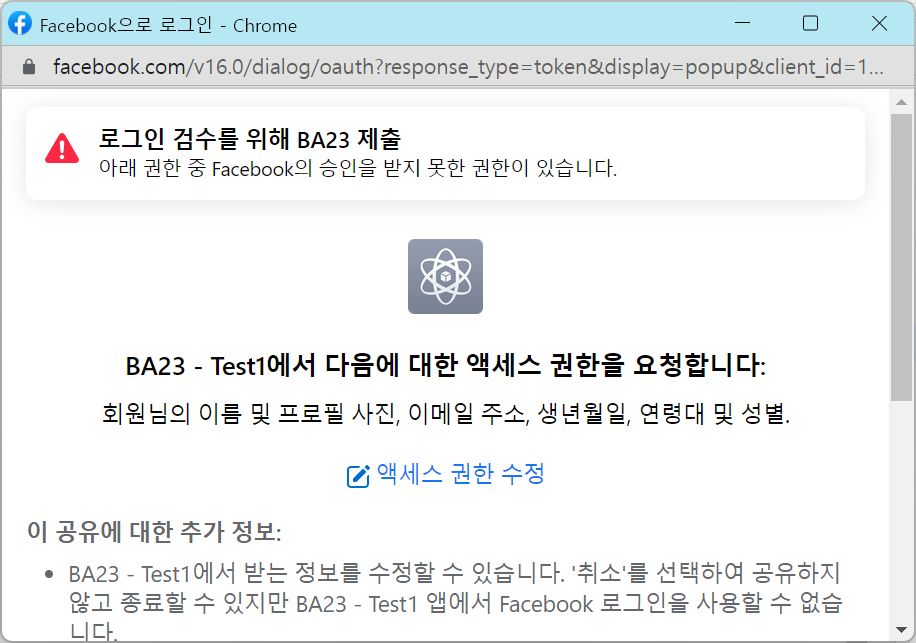

- API 테스트 결과

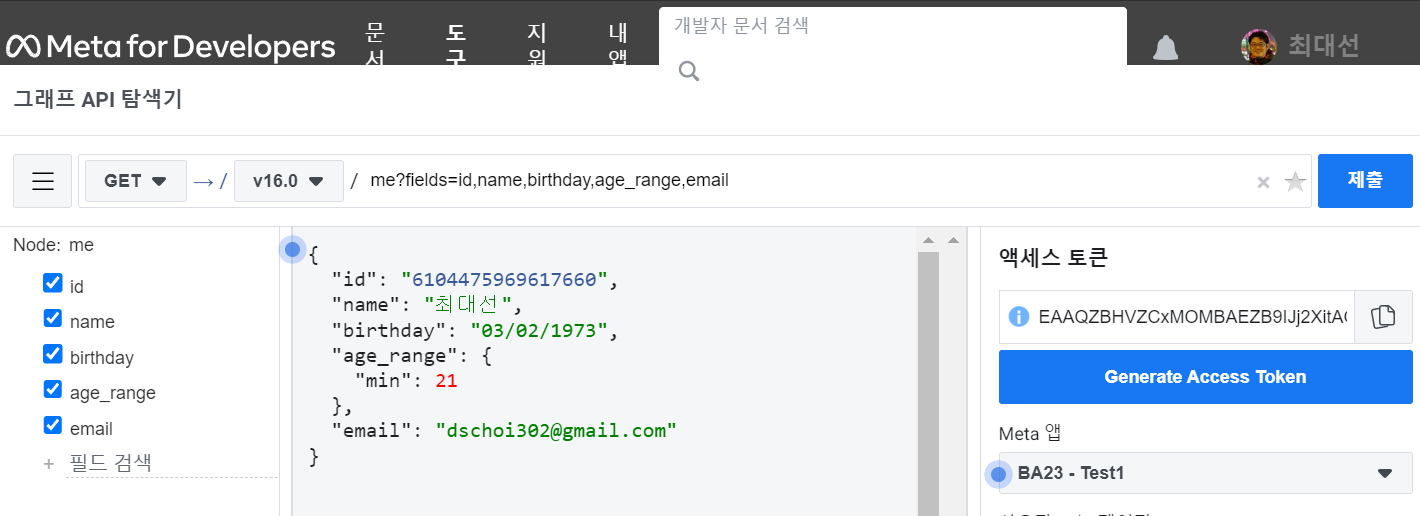


### 3) 타 사용자 정보 조회

- 테스트 사용자

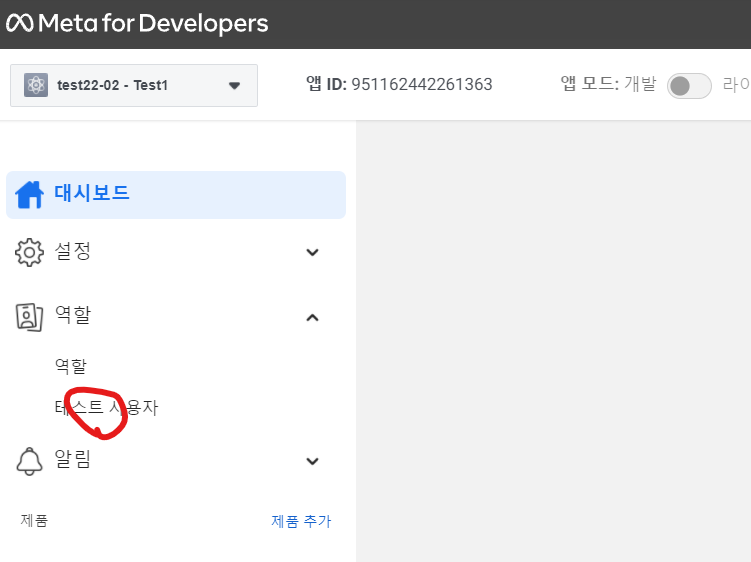

- 액세스 토큰 및 권한
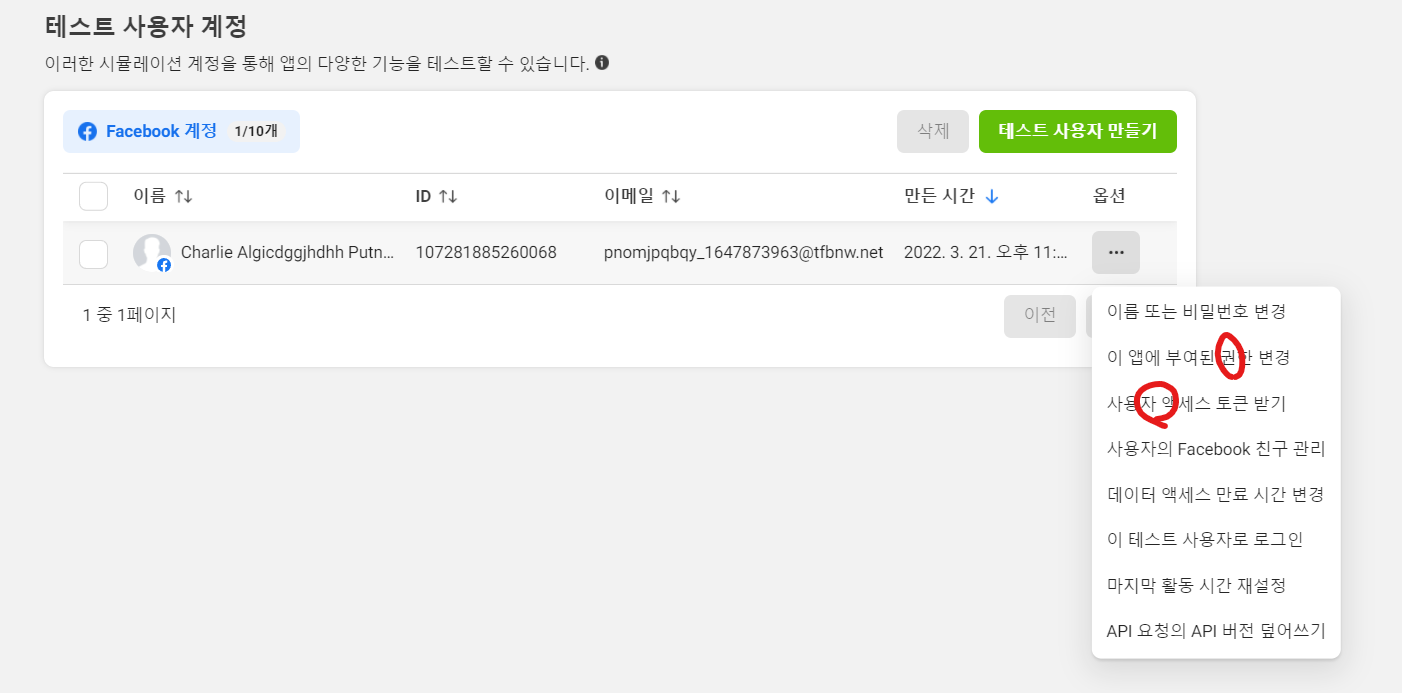

### 4) Access token 확장 
- 만료일 연장 or 재발급 받기 

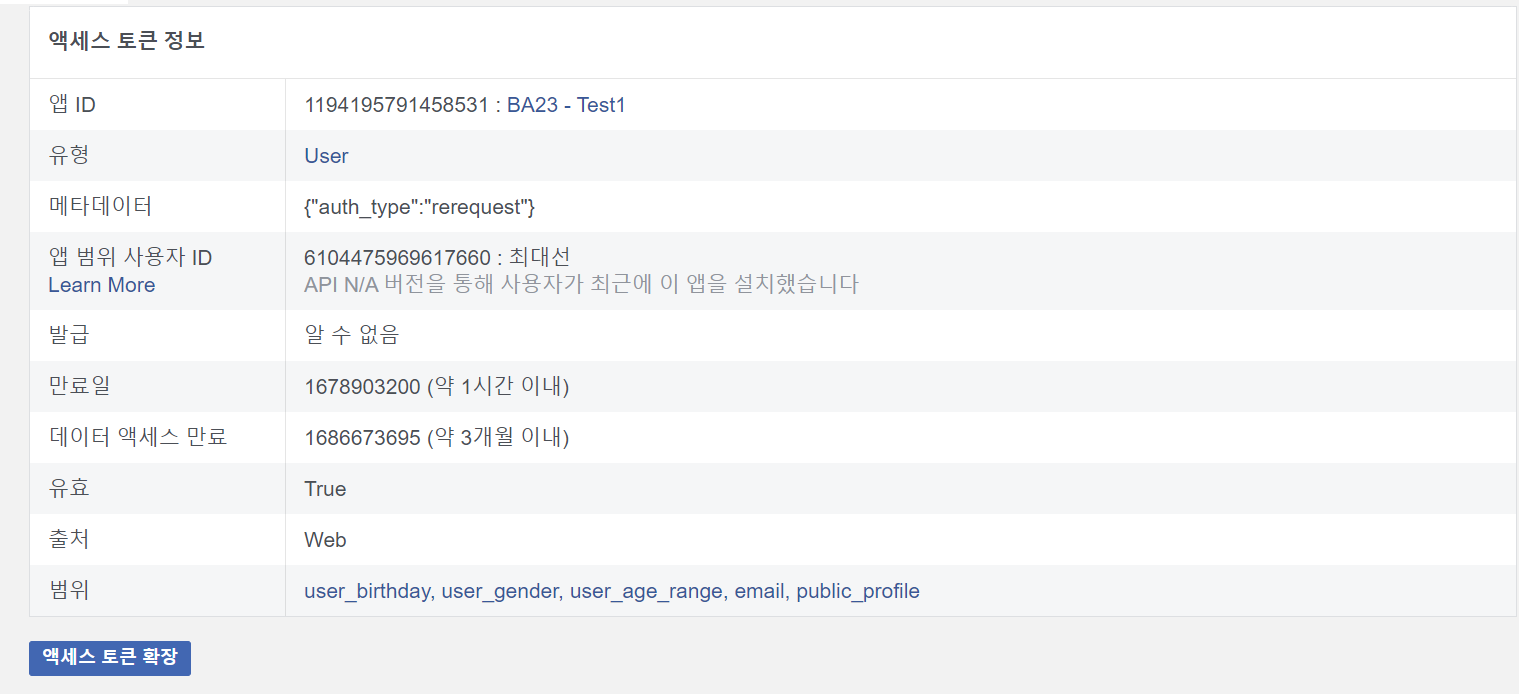



### 5) Python API
- facebook sdk 설치



In [10]:
!pip install facebook-sdk

### 6) api  활용 python code 

- 참조 문서 : 

https://developers.facebook.com/docs/graph-api

https://facebook-sdk.readthedocs.io/en/latest/api.html


### api code test


In [11]:
import urllib3
import facebook
import requests


token='EAAbS1GnjGd0BAGG3EbKF1X1bj95OqrUSRDB4pzCsjkFer0y3kGYfMBYvD9S9rD7kpVaJQ3QRf8IK8FQxYuLhSMi4gRuAMDLdJBoOLJe72g2ZBfxyhylGxI2R3HL8dpMbZAVW6wvZCsgciyRZA1rZC8rfIf2wEV2DllpGA7FppvCZCLund4YnlZC'
graph = facebook.GraphAPI(access_token=token)
profile = graph.request('me?fields=id,name,birthday, age_range, email')

print (profile)

{'id': '115666951474170', 'name': '이하연', 'birthday': '07/06/1999', 'age_range': {'min': 21}, 'email': 'papepopepe@naver.com'}


# 웹페이지 스크레이핑

## 정적 웹페이지 파싱

### 1) 웹페이지 가져오기
- urllib.request.urlopen(url)


In [1]:

import urllib.request
hollys_url="https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store="

html= urllib.request.urlopen(hollys_url)

print(html)

### 2)  beautifulsoup 설치



In [2]:
!pip install beautifulsoup4

### 3)  파싱

- 연습용 html 로 실행
- BeautifulSoup() : 파싱
- soup : 파싱된 객체
- prettify() : 파싱된 객체 구조를 예쁘게 보여줌

In [3]:
from bs4 import BeautifulSoup 

html= '''
<h1 id="title">숭실대학교</h1>
<div class="top">
<ul class="menu">  <li> <a href=http://www.ssu.ac.kr/member/login.html class="login">로그인 </a></li></ul>
<ul class="dept"> 
    <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
    <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
    <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
</ul>
</div>
'''

soup=BeautifulSoup (html, 'html.parser')

print ( soup.prettify())

<h1 id="title">
 숭실대학교
</h1>
<div class="top">
 <ul class="menu">
  <li>
   <a class="login" href="http://www.ssu.ac.kr/member/login.html">
    로그인
   </a>
  </li>
 </ul>
 <ul class="dept">
  <li>
   <a href="http://www.ssu.ac.kr/sw/">
    소프트웨어학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/ai/">
    AI융합학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/stat/">
    정보통계학부
   </a>
  </li>
 </ul>
</div>



### 4) 파싱된 객체 보기

- 파싱 : 텍스트 -> 객체 , 브라우저가 하는 일

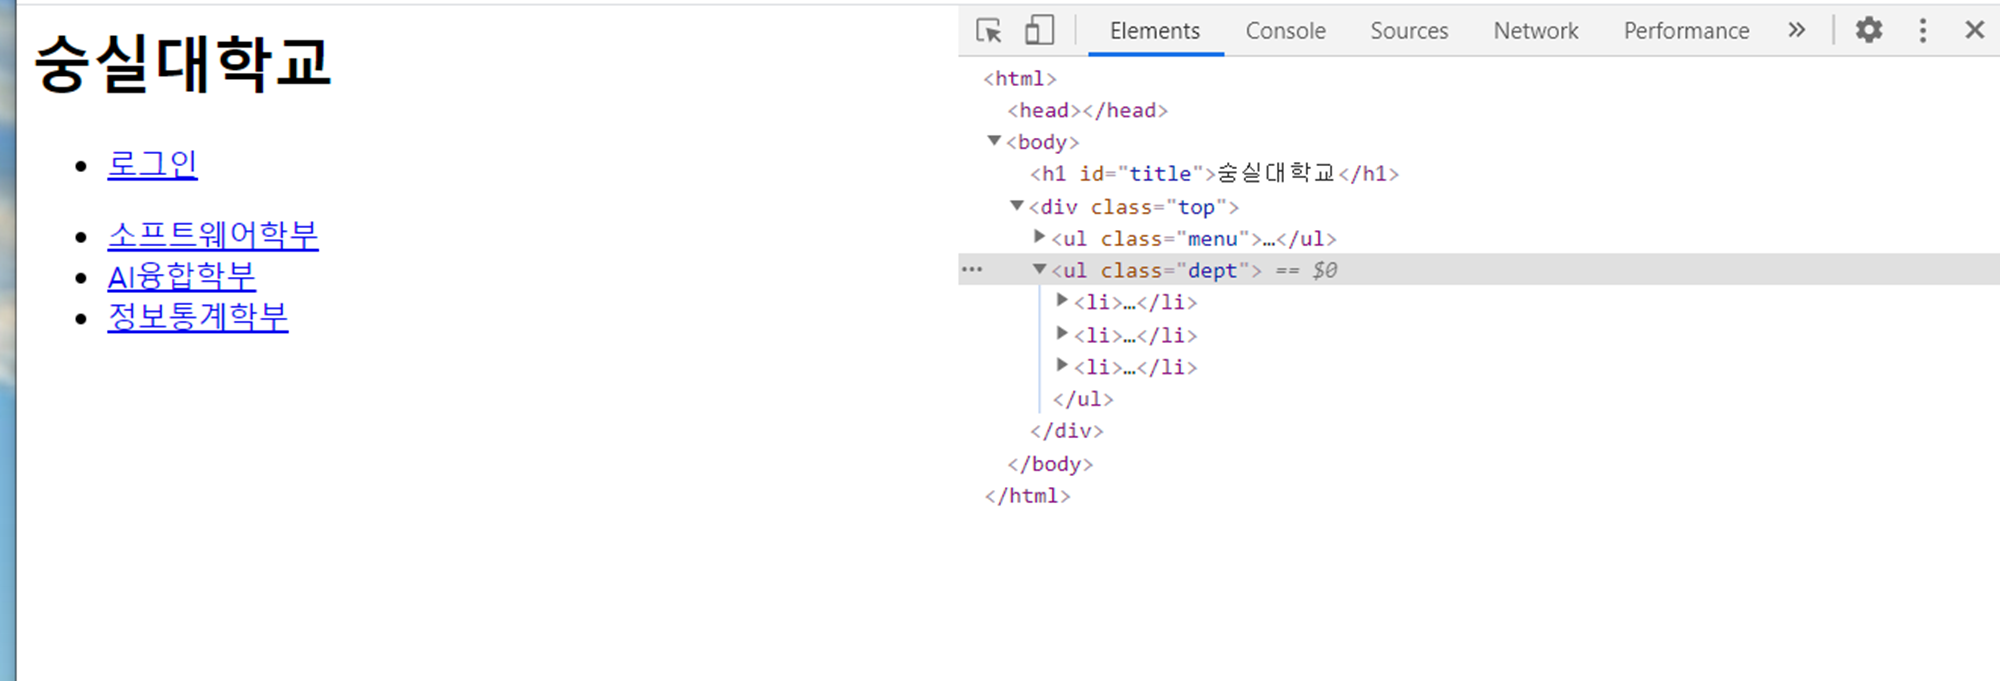

- soup 객체 : 파이썬에서 html 태그에 접근


In [7]:
soup.h1

<h1 id="title">숭실대학교</h1>

In [8]:
soup.ul  # 첫번째 아이템만 보여줌

<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>

In [9]:
soup.li

<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>

- 아이템이 여러개인 경우 : find_all () => list로 return 함

In [10]:
soup.find_all("ul")

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>]

In [11]:
soup.find_all("li")[2].string

'AI융합학부'

### 5) 검색

- attrs : tag의 속성 이름과 값을 dict 로 구성

In [12]:
tag_a= soup.a #첫번째
tag_a

<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>

In [13]:
tag_a.attrs 

{'href': 'http://www.ssu.ac.kr/member/login.html', 'class': ['login']}

In [14]:
tag_a['href']  # = tag_a.attrs['href']

'http://www.ssu.ac.kr/member/login.html'

- find(), find_all()  : 태그, 속성, string, re, list 등등 으로찾기

In [15]:
soup.find_all('li')

[<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [16]:
# 속성
soup.find_all (id="title")

[<h1 id="title">숭실대학교</h1>]

In [17]:
# class 속성은 아래 처럼 표기  class="login"는 error 남

soup.find_all( attrs={'class':'login'} )

[<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>]

In [18]:
# list
soup.find_all (['ul','li'])

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [19]:
# text 찾기 : string =   ; exact matching

soup.find(string="소프트웨어학부")

'소프트웨어학부'

In [20]:
# 부분 matching re

import re
soup.find_all(string =re.compile("학부"))

['소프트웨어학부', 'AI융합학부', '정보통계학부']

* .string : markup 제외 텍스트만 가져오기 

In [ ]:
title = soup.find(id="title")
title.string

In [ ]:
all= soup.find_all("a")
for item in all:
    print (item.string)

- 기타 참조 문서

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## 크롤링 해서 데이터 수집

- 크롤링 허용 정책 확인  : 사이트주소/robots.txt   
    예) http://www.hanbit.co.kr/robots.txt
   - 없으면 허용
   
- 할리스 커피 : 매장 정보 크롤링
    - https://www.hollys.co.kr/store/korea/korStore2.do
    - html 소스 보기 : CTRL+U 또는 [F12]
    
- 소스 위치 및 검색 구조 파악
    - 소스위치 "매장명"으로 검색
    - 페이지 넘김
    - 검색키워드 넣어보기

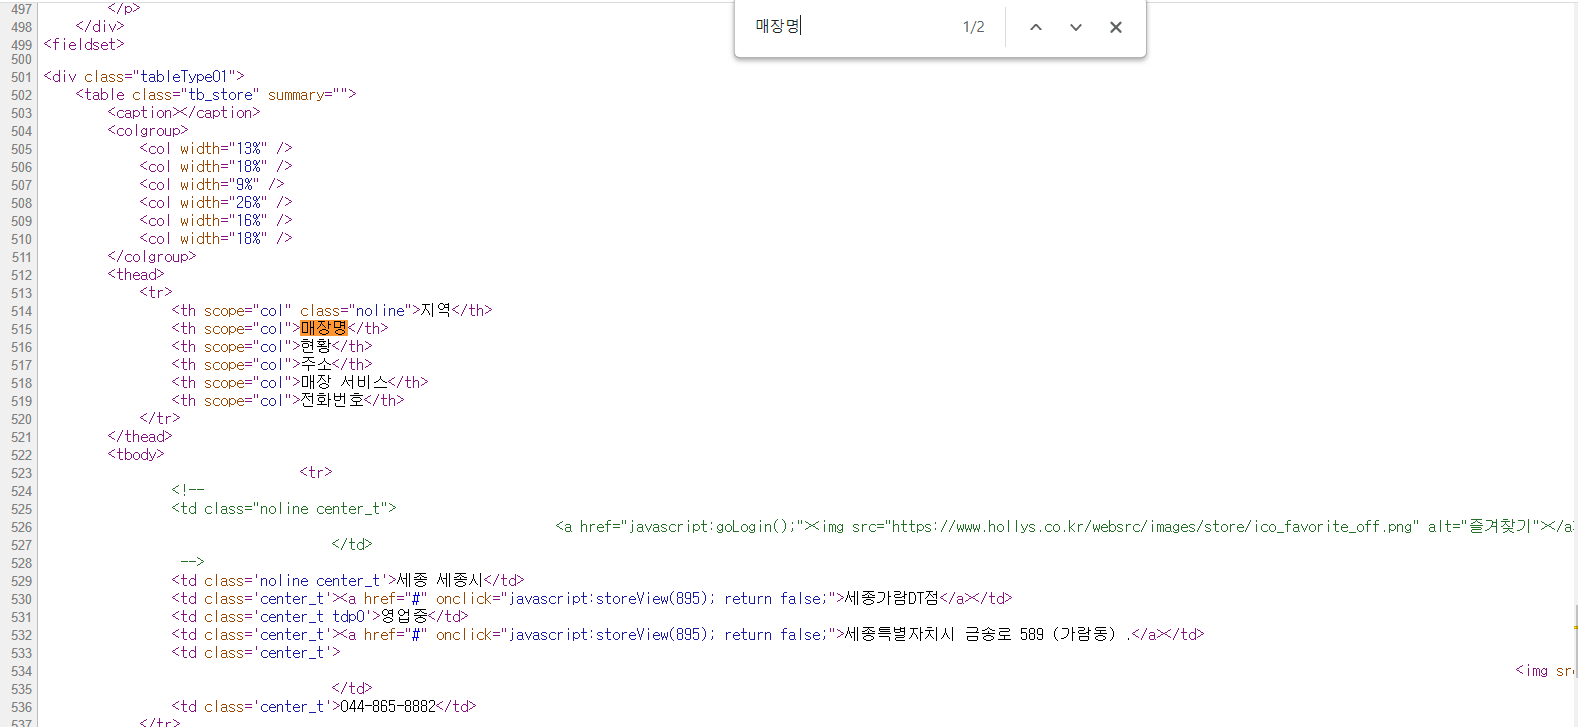

### 1) html 가져오기

In [21]:
import urllib.request
hollys_url="https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store="

html= urllib.request.urlopen(hollys_url)
print (html)

### 2) 파싱

In [22]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>할리스</title>
<meta charset="utf-8"/>
<meta content="HOLLYS" name="Subject">
<meta content="HOLLYS" name="Title"/>
<meta content="HOLLYS,HOLLYS,할리스,할리스,커피" name="Keywords"/>
<meta content="할리스는 1998년 국내 첫 에스프레소 커피전문점을 개점한 순수 국내브랜드로서 당당하게 시장 선점이라는 확고한 위치를 확보하고 국내 에스프레소 커피시장을 주도해 나가고 있습니다." name="Description"/>
<meta content="HOLLYS F&amp;B" name="Author"/>
<meta content="HOLLYS F&amp;B" name="Publisher"/>
<meta content="COFFEE,커피,음료,푸드" name="Classification"/>
<meta content="Korea" name="Location"/>
<meta content="2015.04.01" name="Author-Date"/>
<meta content="2023.03.16" name="Date"/>
<meta content="HOLLYS, HOLLYS F&amp;B" name="Distribution"/>
<meta content="HOLLYS" name="Copyright"/>
<meta content="website" property="og:type"/>
<meta content="할리스" property="og:title"/>
<meta content="HOLLYS" property="og:description"/>
<meta content="https://www.hollys.co.kr/" property="og:url">
<link hr

### 3) 찾기 

In [23]:
tbody= soup.find("tbody")
tbody.prettify()

'<tbody>\n <tr>\n  <!--\r\n\t\t\t\t<td class="noline center_t">\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>\r\n\t\t\t\t\t\t\t\t\t</td>\r\n\t\t\t\t -->\n  <td class="noline center_t">\n   서울 마포구\n  </td>\n  <td class="center_t">\n   <a href="#" onclick="javascript:storeView(1056); return false;">\n    신촌역점\n   </a>\n  </td>\n  <td class="center_t tdp0">\n   영업중\n  </td>\n  <td class="center_t">\n   <a href="#" onclick="javascript:storeView(1056); return false;">\n    서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층\n   </a>\n  </td>\n  <td class="center_t">\n   <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>\n  </td>\n  <td class="center_t">\n   02-325-7588\n  </td>\n </tr>\n <tr>\n  <!--\r\n\t\t\t\t<td class="noline center_t">\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr

### 4)  분해하기

In [24]:
tr=tbody.find('tr')
tr

<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">서울 마포구</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">신촌역점</a></td>
<td class="center_t tdp0">영업중</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층</a></td>
<td class="center_t">
<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
</td>
<td class="center_t">02-325-7588</td>
</tr>

In [25]:
tds=tr.find_all('td')
tds

[<td class="noline center_t">서울 마포구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">신촌역점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층</a></td>,
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>,
 <td class="center_t">02-325-7588</td>]

In [26]:
for td in tds:
    print (td.string)

서울 마포구
신촌역점
영업중
서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층
None
02-325-7588


### 5)  pandas 데이터프레임 만들기

- list로  만들기 

In [27]:
result=[]
trs=tbody.find_all('tr')
for tr in trs:
    tds=tr.find_all('td')
    name=tds[1].string
    sido=tds[0].string
    addr=tds[3].string
    phone=tds[5].string
    result.append([name,sido,addr,phone])

result

[['신촌역점', '서울 마포구', '서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층', '02-325-7588'],
 ['BMC점', '경기 고양시 일산동구', '경기도 고양시 일산동구 동국로 32 (식사동) 산학협력관 1층', '031-961-5692'],
 ['청주율량현대점', '충북 청주시 청원구', '충청북도 청주시 청원구 율봉로 150 .', '043-241-0005'],
 ['연세대학교원주장례식장점', '강원 원주시', '강원도 원주시 일산로 20 장례식장 1층', '033-735-3335'],
 ['원주세브란스기독병원점',
  '강원 원주시',
  '강원동 원주시 일산로 20 원주세브란스기독병원 외래센터 1층',
  '033-735-3339'],
 ['순천향대학교 천안병원 외래점',
  '충남 천안시 동남구',
  '충청남도 천안시 동남구 순천향6길 31 (봉명동, 순천향대학교천안병원) 외래센터 2층',
  '.'],
 ['순천향대학교 천안병원 본관점',
  '충남 천안시 동남구',
  '충청남도 천안시 동남구 순천향6길 31 (봉명동, 순천향대학교천안병원) 본관 1층',
  '.'],
 ['(천)이인휴게소점', '충남 공주시', '충청남도 공주시 이인면 논산천안고속도로 32 (이인상행휴게소) .', '.'],
 ['(논)탄천휴게소2호점', '충남 공주시', '충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .', '.'],
 ['의정부역점',
  '경기 의정부시',
  '경기도 의정부시 신흥로232번길 5-31,(의정부동, 아이비타워) 1층',
  '031-876-7006']]

### 6) 데이터 프레임 만들기

In [28]:
import pandas as pd
hollys_df= pd.DataFrame (result , columns=("store","sido","address", "phone" ) )
hollys_df.head()

,store,sido,address,phone
0,신촌역점,서울 마포구,"서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층",02-325-7588
1,BMC점,경기 고양시 일산동구,경기도 고양시 일산동구 동국로 32 (식사동) 산학협력관 1층,031-961-5692
2,청주율량현대점,충북 청주시 청원구,충청북도 청주시 청원구 율봉로 150 .,043-241-0005
3,연세대학교원주장례식장점,강원 원주시,강원도 원주시 일산로 20 장례식장 1층,033-735-3335
4,원주세브란스기독병원점,강원 원주시,강원동 원주시 일산로 20 원주세브란스기독병원 외래센터 1층,033-735-3339


### 7) 저장하기 :  csv 로 저장 

- df.to_csv("파일이름", encoding="cp949", mode="w", index=True) 


In [29]:
hollys_df.to_csv("hollys_df", encoding="cp949", mode="w", index=True)

### 1.1) 여러 페이지 가져오기

In [30]:
for page in range(1,54):
    hollys_url= "https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store="%page
    print (hollys_url)


https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=12&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do

## 전체 프로그램

In [31]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime


def hollys_store(result):
    for page in range(1,54):
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
    return


def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출 
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv('hollys.csv', encoding='cp949', mode='w', index=True)
    del result[:]
       
if __name__ == '__main__':
     main()


Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=12&sido=&gugun=&store=
https://www.